In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

In [2]:
import re

def comprehensive_preprocessing(text):
    # Menghapus URL
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)

    # Menghapus karakter khusus dan angka
    text = re.sub(r'\W|[\d_]', ' ', text)

    # Menghapus kata yang berulang
    text = re.sub(r'\b(\w+)( \1\b)+', r'\1', text)

    # Menghapus emoji atau simbol khusus
    emoji_pattern = re.compile(
        "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F700-\U0001F77F"  # alchemical symbols
        u"\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
        u"\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
        u"\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
        u"\U0001FA00-\U0001FA6F"  # Chess Symbols
        u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
        u"\U00002702-\U000027B0"  # Dingbats
        u"\U000024C2-\U0001F251"
        "]+"
    )

    text = emoji_pattern.sub(r'', text)

    # Menghapus tanda baca
    text = re.sub(r'[^\w\s#]', ' ', text)

    # Menghapus kata-kata singkat
    text = ' '.join([word for word in text.split() if len(word) > 2])

    # Menghapus mention
    text = re.sub(r'@\w+', '', text)

    # Mengonversi teks ke huruf kecil
    text = text.lower()

    # Menghapus spasi berlebih
    text = ' '.join(text.split())

    return text

In [3]:
df = pd.read_csv('data/dataset_jurnal_indo_5k.csv')

df['data'] = df['title'] + df['abstrac_clean']
df.head(500)

,jid,aid,date,title,desc,abstrac_clean,data
0,10004,oai:ojs2.profood.unram.ac.id:article/11,2017-03-17,EFEKTIVITAS PERLAKUAN OZON TERHADAP MUTU KANGK...,The aimed of this research was to investigate ...,penelitian ini bertujuan untuk menentukan meto...,EFEKTIVITAS PERLAKUAN OZON TERHADAP MUTU KANGK...
1,10004,oai:ojs2.profood.unram.ac.id:article/12,2017-03-17,PENYIMPANAN MANGGA SECARA MODIFIKASI ATMOSFI...,Modified Atmosphere Storage of Mango with Ca(O...,penelitian tentang “penyimpanan mangga secara...,PENYIMPANAN MANGGA SECARA MODIFIKASI ATMOSFI...
2,10004,oai:ojs2.profood.unram.ac.id:article/13,2017-03-17,PENGARUH RASIO SUSU FULL CREAM DENGAN JAGUNG ...,The aimed of this research was to determine th...,penelitian ini bertujuan untuk mengetahui peng...,PENGARUH RASIO SUSU FULL CREAM DENGAN JAGUNG ...
3,10004,oai:ojs2.profood.unram.ac.id:article/14,2017-03-17,KAJIAN MUTU DAN DAYA SIMPAN KEJU MOZZARELLA PR...,This study aims to determine the best probioti...,penelitian ini bertujuan untuk mengetahui kons...,KAJIAN MUTU DAN DAYA SIMPAN KEJU MOZZARELLA PR...
4,10004,oai:ojs2.profood.unram.ac.id:article/15,2017-03-17,PENGARUH PENAMBAHAN PROBIOTIK (Lactobacillus c...,Mozzarella cheese is one of the Italian cheese...,keju mozarella salah satu keju khas italia yan...,PENGARUH PENAMBAHAN PROBIOTIK (Lactobacillus c...
...,...,...,...,...,...,...,...
495,1000,oai:ojs.ejournal.unsrat.ac.id:article/41029,2022-07-30,Oral Manifestation of Sexual Transmitted Diseases,Abstract: Sexually transmitted diseases (STDs)...,: penyakit menular seksual (pms) merupakan inf...,Oral Manifestation of Sexual Transmitted Disea...
496,1000,oai:ojs.ejournal.unsrat.ac.id:article/41044,2022-07-30,Behavioral Changes in Cleansing Complete Dentu...,Abstract: Tooth loss experienced by elderly ca...,: kehilangan gigi yang dialami oleh lanjut usi...,Behavioral Changes in Cleansing Complete Dentu...
497,1000,oai:ojs.ejournal.unsrat.ac.id:article/41102,2022-07-27,Management of Exfoliative Cheilitis,Abstract: Cheilitis is an inflammation of the ...,: keilitis adalah adanya inflamasi pada vermil...,Management of Exfoliative Cheilitis: keilitis ...
498,1000,oai:ojs.ejournal.unsrat.ac.id:article/41279,2022-08-25,Management of Primary Tooth in Agenesis of Lat...,Abstract: Agenesis is commonly found in maxill...,: umumnya agenesis dijumpai pada gigi insisivu...,Management of Primary Tooth in Agenesis of Lat...


In [4]:
data = df['data'].astype(str).apply(comprehensive_preprocessing)
data

0       efektivitas perlakuan ozon terhadap mutu kangk...
1       penyimpanan mangga secara modifikasi atmosfir ...
2       pengaruh rasio susu full cream dengan jagung m...
3       kajian mutu dan daya simpan keju mozzarella pr...
4       pengaruh penambahan probiotik lactobacillus ca...
                              ...                        
4995    efek pemberian depo medroxy progesteron acetat...
4996    faktor yang berhubungan dengan stigma masyarak...
4997    faktor faktor yang mempengaruhi kepatuhan peng...
4998    kurma sebagai alternatif untuk meningkatkan ka...
4999    faktor penyebab ketidaklengkapan pengisian dok...
Name: data, Length: 5000, dtype: object

In [8]:
df['data_clean'] = data
# df.to_csv('dataset_clean_5k.csv')
df

data_jid = df[df['jid']==10004]
data_jid

data = data_jid['data'].astype(str).apply(comprehensive_preprocessing)

In [9]:
from gensim.models import Word2Vec
import numpy as np

# Tokenisasi deskripsi jurnal
tokenized_data = [doc.split() for doc in data]

# Membangun model Word2Vec
word2vec_model = Word2Vec(sentences=tokenized_data, vector_size=100, window=5, min_count=1, workers=4)

# Melakukan vektorisasi dengan Word2Vec
word_vectors = word2vec_model.wv

# Menciptakan vektor rata-rata untuk setiap dokumen
def document_vector(doc):
    # Mengambil vektor kata-kata dalam dokumen yang ada dalam model Word2Vec
    vectors = [word2vec_model.wv[word] for word in doc if word in word2vec_model.wv]
    # Mengembalikan vektor rata-rata dari vektor kata-kata
    return np.mean(vectors, axis=0)

# Menghasilkan vektor untuk setiap dokumen
document_vectors = [document_vector(doc) for doc in tokenized_data]

# Konversi ke dalam format array numpy
X = np.array(document_vectors)


In [10]:
# Menentukan jumlah cluster yang diinginkan
jumlah_cluster = 1

# Menerapkan algoritma K-Means
kmeans = KMeans(n_clusters=jumlah_cluster)
kmeans.fit(X)

KMeans(n_clusters=1)

In [13]:
# Mendapatkan koordinat pusat cluster
centroid = kmeans.cluster_centers_

# Menghitung jarak antara setiap titik data dengan centroid
jarak_ke_centroid = np.sqrt(np.sum((X - centroid)**2, axis=1))

# Menentukan batas jarak yang dianggap sebagai "outscoop"
# Misalnya, jika ingin menentukan data yang berjarak lebih dari 2 kali standar deviasi dari centroid
outscoop_threshold = np.mean(jarak_ke_centroid) + 2 * np.std(jarak_ke_centroid)

# Memisahkan data yang masih masuk dalam "scoop" dan "outscoop"
scoop_data = X[jarak_ke_centroid <= outscoop_threshold]
outscoop_data = X[jarak_ke_centroid > outscoop_threshold]

print("Data dalam scoop:")
print(scoop_data)

print("\nData outscoop:")
print(outscoop_data)

Data dalam scoop:
[[-0.16109867  0.1512064   0.02236975 ... -0.27288362  0.07932292
   0.00096248]
 [-0.17864493  0.1677538   0.02410134 ... -0.30450502  0.08838808
   0.00100406]
 [-0.19869375  0.18688588  0.02567409 ... -0.33681342  0.09945455
   0.00173316]
 ...
 [-0.14644778  0.13683102  0.02053554 ... -0.24886942  0.0724088
   0.00149224]
 [-0.20205694  0.19124673  0.02613661 ... -0.34519485  0.10078534
   0.00234087]
 [-0.18310793  0.17411189  0.02446969 ... -0.3122042   0.09018881
   0.00203848]]

Data outscoop:
[[-2.40065932e-01  2.25350812e-01  3.10376119e-02  1.25655439e-02
   1.27093017e-01 -4.05342847e-01  2.00322092e-01  7.90717959e-01
  -2.51613170e-01 -2.03124374e-01 -3.72393072e-01 -3.81435096e-01
  -1.97881669e-01  1.88063979e-01  8.47961381e-02 -2.38576263e-01
   8.99242610e-03 -3.31308424e-01 -1.18454866e-01 -7.50016987e-01
   1.36790901e-01  2.73498446e-01  2.05576539e-01 -6.92429170e-02
   1.16148740e-02  2.59735119e-02 -3.35886300e-01 -2.55641341e-01
  -3.31927299

c:\Users\USER\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\USER\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


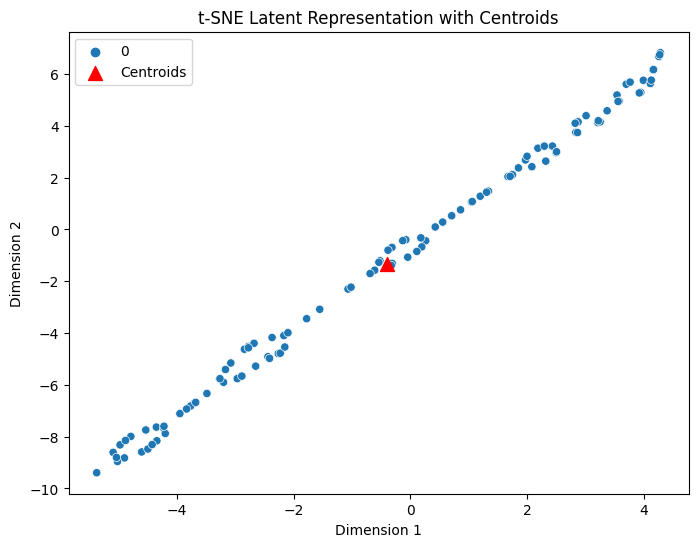

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
import numpy as np

def plot_vector_distribution(vector_matrix, kmeans_labels):
    tsne = TSNE(random_state=0)
    tsne_result = tsne.fit_transform(vector_matrix)

    df_tsne = pd.DataFrame(tsne_result, columns=['Dimension 1', 'Dimension 2'])
    df_tsne['Cluster Label'] = kmeans_labels

    cluster_palette = sns.color_palette('tab10', n_colors=len(np.unique(kmeans_labels)))
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='Dimension 1', y='Dimension 2', hue='Cluster Label', data=df_tsne, palette=cluster_palette)
    
    # Menambahkan centroid ke dalam plot
    centroids = []
    for label in np.unique(kmeans_labels):
        centroid = np.mean(tsne_result[kmeans_labels == label], axis=0)
        centroids.append(centroid)
    centroids = np.array(centroids)
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='^', c='red', s=100, label='Centroids')
    
    plt.title('t-SNE Latent Representation with Centroids')
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.legend()
    plt.show()

plot_vector_distribution(X, kmeans.labels_)


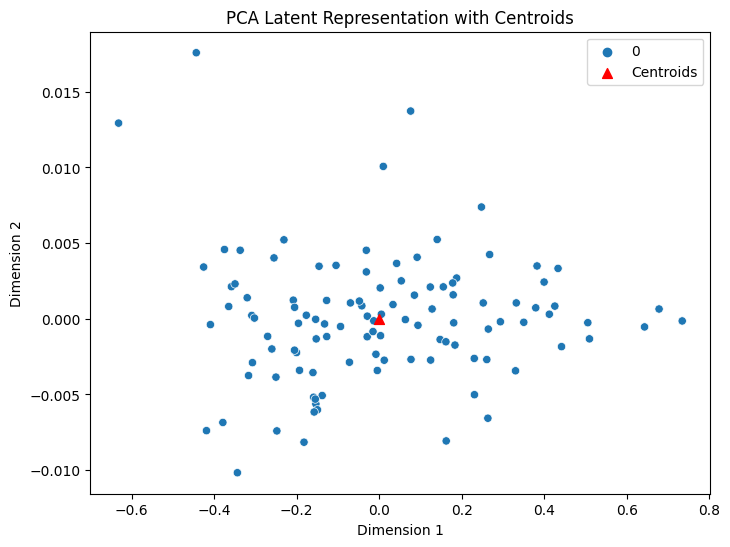

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np

def plot_vector_distribution(vector_representation, kmeans_labels):
    pca = PCA(n_components=2, random_state=0)
    pca_result = pca.fit_transform(vector_representation)

    df_pca = pd.DataFrame(pca_result, columns=['Dimension 1', 'Dimension 2'])
    df_pca['Cluster Label'] = kmeans_labels

    cluster_palette = sns.color_palette('tab10', n_colors=len(np.unique(kmeans_labels)))
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='Dimension 1', y='Dimension 2', hue='Cluster Label', data=df_pca, palette=cluster_palette)
    
    # Menambahkan centroid ke dalam plot
    centroids = []
    for label in np.unique(kmeans_labels):
        centroid = np.mean(pca_result[kmeans_labels == label], axis=0)
        centroids.append(centroid)
    centroids = np.array(centroids)
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='^', c='red', s=50, label='Centroids')
    
    plt.title('PCA Latent Representation with Centroids')
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.legend()
    plt.show()

plot_vector_distribution(X, kmeans.labels_)

C:\Users\USER\AppData\Local\Temp\ipykernel_11016\371883579.py:17: UserWarning: 
The palette list has fewer values (1) than needed (2) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(x='Dimension 1', y='Dimension 2', hue='Scoop Label', style='Scoop Label', data=df_pca, palette=cluster_palette, markers=['o', 'X'], legend='full')


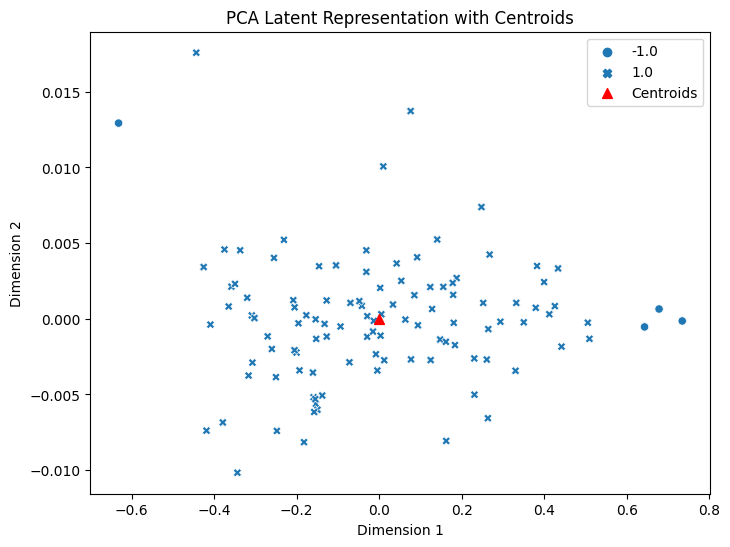

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np

def plot_vector_distribution(vector_representation, kmeans_labels, scoop_labels):
    pca = PCA(n_components=2, random_state=0)
    pca_result = pca.fit_transform(vector_representation)

    df_pca = pd.DataFrame(pca_result, columns=['Dimension 1', 'Dimension 2'])
    # df_pca['Cluster Label'] = kmeans_labels
    df_pca['Scoop Label'] = scoop_labels

    cluster_palette = sns.color_palette('tab10', n_colors=len(np.unique(kmeans_labels)))
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='Dimension 1', y='Dimension 2', hue='Scoop Label', style='Scoop Label', data=df_pca, palette=cluster_palette, markers=['o', 'X'], legend='full')
    
    # Menambahkan centroid ke dalam plot
    centroids = []
    for label in np.unique(kmeans_labels):
        centroid = np.mean(pca_result[kmeans_labels == label], axis=0)
        centroids.append(centroid)
    centroids = np.array(centroids)
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='^', c='red', s=50, label='Centroids')
    
    plt.title('PCA Latent Representation with Centroids')
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.legend()
    plt.show()

# Menentukan label untuk scoop dan outscoop
scoop_labels = np.ones(len(X))
scoop_labels[jarak_ke_centroid > outscoop_threshold] = -1

plot_vector_distribution(X, kmeans.labels_, scoop_labels)


In [18]:
import pandas as pd

# Membuat DataFrame dengan data teks dan label scoop
df = pd.DataFrame({'Data': data_jid['data'].astype(str).apply(comprehensive_preprocessing),
                   'Label': scoop_labels})

# Memisahkan data dalam scoop dan outscoop
inScoop_df = df[df['Label'] == 1]
outScoop_df = df[df['Label'] == -1]

print("Data dalam scoop:")
print(inScoop_df)

print("\nData outscoop:")
print(outScoop_df)


Data dalam scoop:
                                                  Data  Label
0    efektivitas perlakuan ozon terhadap mutu kangk...    1.0
1    penyimpanan mangga secara modifikasi atmosfir ...    1.0
2    pengaruh rasio susu full cream dengan jagung m...    1.0
3    kajian mutu dan daya simpan keju mozzarella pr...    1.0
4    pengaruh penambahan probiotik lactobacillus ca...    1.0
..                                                 ...    ...
103  potensi pembentukan pati resisten dan antioksi...    1.0
105  kajian penambahan ubi jalar ungu ipomoea batat...    1.0
106  karakterisasi mutu teh hitam metode ctc crushi...    1.0
107  analisis mutu kimia mikrobiologi dan organolep...    1.0
108  pengaruh konsentrasi starter scoby symbiotic c...    1.0

[105 rows x 2 columns]

Data outscoop:
                                                  Data  Label
18   pengaruh rasio tepung biji kecipir dengan tepu...   -1.0
34   smart cacao dryer berbasis hybrid sebagai alat...   -1.0
56   identif